## House Sales in Ontario 

Information from the dataset...

"This dataset includes the listing prices for the sale of properties (mostly houses) in Ontario. They are obtained for a short period of time in July 2016 and include the following fields: - Price in dollars - Address of the property - Latitude and Longitude of the address obtained by using Google Geocoding service - Area Name of the property obtained by using Google Geocoding service

This dataset will provide a good starting point for analyzing the inflated housing market in Canada although it does not include time related information. Initially, it is intended to draw an enhanced interactive heatmap of the house prices for different neighborhoods (areas)

However, if there is enough interest, there will be more information added as newer versions to this dataset. Some of those information will include more details on the property as well as time related information on the price (changes).

This is a somehow related articles about the real estate prices in Ontario: http://www.canadianbusiness.com/blogs-and-comment/check-out-this-heat-map-of-toronto-real-estate-prices/

I am also inspired by this dataset which was provided for King County https://www.kaggle.com/harlfoxem/housesalesprediction "


Tasks and questions:
- Which region have more qtt of houses on sale?
- Which region have more valuable houses?




## Data Analysis

In [1]:
#Importing Data Analysis Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting Data
df = pd.read_csv('properties.csv')

In [3]:
#Checking Dataset
df.head(5)

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [4]:
df.columns

Index(['Unnamed: 0', 'Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [5]:
#Changing some Column Names
df.rename(columns={'Unnamed: 0': 'ID', 'Price ($)': 'Price'}, inplace=True)
df.columns

Index(['ID', 'Address', 'AreaName', 'Price', 'lat', 'lng'], dtype='object')

In [6]:
df.shape

(25351, 6)

In [7]:
df.describe()

,ID,Price,lat,lng
count,25351.000000,2.535100e+04,25351.000000,25351.000000
mean,42878.517613,5.645438e+05,37.326614,-85.218379
std,31456.247046,8.475962e+05,82.858347,73.093572
min,0.000000,0.000000e+00,-999.000000,-999.000000
25%,19940.000000,2.199000e+05,43.401087,-80.308159
50%,34037.000000,3.719000e+05,43.715977,-79.503342
75%,61501.500000,6.199000e+05,44.466711,-79.107326
max,124929.000000,3.250000e+07,53.851017,1.074519


In [8]:
#Eliminating houses with invalid lat and lng
df2 = df[(df['lat'] != -999 ) & (df['lng'] != -999)]
df2.shape

(25190, 6)

In [9]:
#Eliminating houses with price <= 100000 and >= 10000000
df3 = df2[(df2['Price'] >= 100000) & (df2['Price'] <= 10000000)]
df3.shape

(22533, 6)

In [10]:
df3.describe()

,ID,Price,lat,lng
count,22533.000000,2.253300e+04,22533.000000,22533.000000
mean,42261.902987,6.126852e+05,43.949890,-79.305733
std,31146.320279,7.320116e+05,0.971694,2.371283
min,0.000000,1.000000e+05,36.160065,-118.061340
25%,19867.000000,2.730000e+05,43.435593,-80.226662
50%,33989.000000,4.049000e+05,43.721104,-79.480759
75%,60944.000000,6.500000e+05,44.423027,-79.087181
max,124929.000000,1.000000e+07,53.851017,1.074519


### Which area have more quantity of houses on sale?

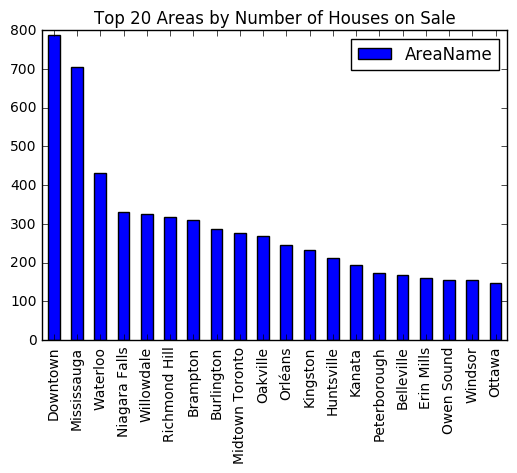

In [11]:
#Creating a TOP 20 Rank by area
qtHouses = pd.DataFrame(df3['AreaName'].value_counts())
qtHouses.sort_values(by='AreaName')
qtHouses[0:20].plot(kind='bar', title='Top 20 Areas by Number of Houses on Sale')

Downtown is the area with most number of houses on sale

### Which area have the most expensive houses on sale ?

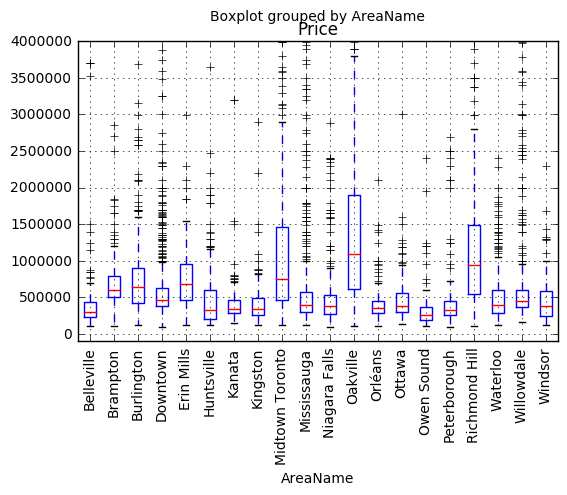

In [13]:
#Boxplot 
topAreasNames = list(qtHouses[0:20].index)
area = df3[df3['AreaName'].isin(topAreasNames)]
#print(topAreasNames)
box_ax = area.boxplot(column='Price', by='AreaName', rot=90, grid=True)
box_ax.set_ylim(-1e5, 4e6)

plt.show()

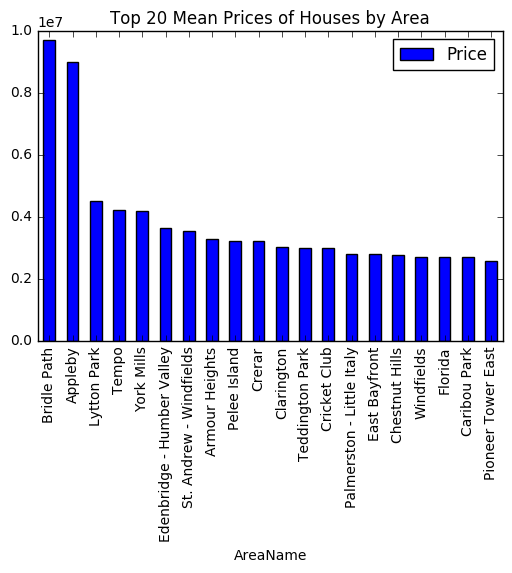

In [40]:
#Mean Price by Area(Top 20)
df3_dropped = df3.drop(['ID','Address','lat','lng'], axis=1)
meanPrices = df3_dropped.groupby(['AreaName']).mean().sort_values(by='Price', axis=0, ascending=False)
topMeanPrices = meanPrices[0:20] 
topMeanPrices.plot(kind='bar', title='Top 20 Mean Prices of Houses by Area')